# GradientBoostingClassifier for 3 variant validation (27 parameters)

### Обучение модели валидации задач по Bad/Good/Agood

In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import json
import numpy as np
from definitions import ROOT_DIR

In [2]:
with open(ROOT_DIR + "/Data/training_validation_dataset.json", "r") as n:
            n = json.load(n)

In [3]:
data = pd.Series(n['data'])

In [4]:
target = pd.Series(n['target'])

In [5]:
data.shape, target.shape

((5135,), (5135,))

In [6]:
data = np.asarray(n['data'], dtype=np.int32)
target = np.asarray(n['target'], dtype=np.int32)

In [7]:
token_name_list = [
    'ADJ', 
    'ADP',
    'ADV',
    'AUX',
    'CCONJ',
    'DET',
    'INTJ',
    'NOUN',
    'NUM',
    'PART',
    'PRON',
    'PROPN',
    'PUNCT',
    'SCONJ',
    'SYM',
    'VERB',
    'X',
    'all_to_num',
    'exist_question',
    'negative_numbers',
    'more_hundred',
    'exist_noun_in',
    'question_in_end',
    'question_not_end',
    'group_calculate',
    'in_bad_list',
    'one_digit',
]
n['feature_names'] = token_name_list

In [8]:
def plot_feature_importances(model):
    n_features = data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), n['feature_names'])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Calculate of default model

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Correctness on the training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Correctness on a test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Correctness on the training set: 0.740
Correctness on a test set: 0.699


#### Визуализация важности признаков

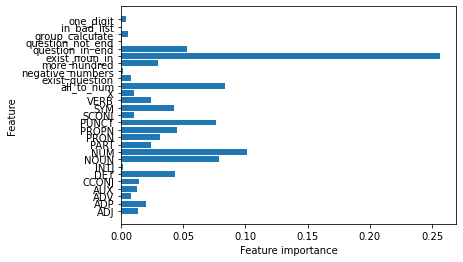

In [11]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
plot_feature_importances(gbrt)

### Confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix
prediction = gbrt.predict(X_test)
confusion = confusion_matrix(y_test, prediction)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[303 134   2]
 [ 94 590   1]
 [102  54   4]]


Confusion matrix
[[0.69020501 0.30523918 0.00455581]
 [0.13722628 0.86131387 0.00145985]
 [0.6375     0.3375     0.025     ]]


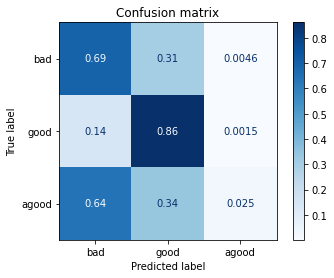

In [13]:
from sklearn.metrics import plot_confusion_matrix
class_names = ('bad', 'good', 'agood')
title = "Confusion matrix"
disp = plot_confusion_matrix(gbrt, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true'
                            )
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)

### Confusion matrix

In [88]:
from sklearn.metrics import confusion_matrix
prediction = gbrt.predict(X_test)
confusion = confusion_matrix(y_test, prediction)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[303 141   6]
 [ 89 597   3]
 [ 81  55   9]]


Confusion matrix
[[0.67333333 0.31333333 0.01333333]
 [0.12917271 0.86647315 0.00435414]
 [0.55862069 0.37931034 0.06206897]]


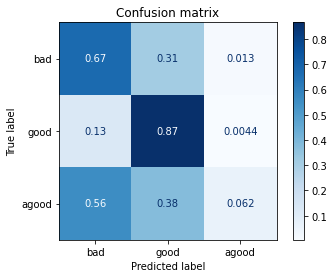

In [89]:
from sklearn.metrics import plot_confusion_matrix
class_names = ('bad', 'good', 'agood')
title = "Confusion matrix"
disp = plot_confusion_matrix(gbrt, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true'
                            )
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)

## Обучение с вариацией по двум параметрам: max_features, max_depth

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
data, target, stratify=target, random_state=42)
max_score = 0
for i in range(1,30):
    for j in range(1,26):
        gbrt = GradientBoostingClassifier(max_depth=i, max_features=j, random_state=0)
        gbrt.fit(X_train, y_train)
        if max_score < gbrt.score(X_test, y_test):
            print(f"max_features={j}", "Correctness on the training set: {:.3f}".format(gbrt.score(X_train, y_train)))
            print(f"max_depth={i}", "Correctness on a test set: {:.3f}".format(gbrt.score(X_test, y_test)))
            print()
            max_score = gbrt.score(X_test, y_test)

max_features=1 Correctness on the training set: 0.665
max_depth=1 Correctness on a test set: 0.666

max_features=2 Correctness on the training set: 0.669
max_depth=1 Correctness on a test set: 0.673

max_features=3 Correctness on the training set: 0.672
max_depth=1 Correctness on a test set: 0.675

max_features=4 Correctness on the training set: 0.674
max_depth=1 Correctness on a test set: 0.681

max_features=2 Correctness on the training set: 0.695
max_depth=2 Correctness on a test set: 0.686

max_features=3 Correctness on the training set: 0.702
max_depth=2 Correctness on a test set: 0.691

max_features=6 Correctness on the training set: 0.711
max_depth=2 Correctness on a test set: 0.693

max_features=2 Correctness on the training set: 0.728
max_depth=3 Correctness on a test set: 0.695

max_features=3 Correctness on the training set: 0.735
max_depth=3 Correctness on a test set: 0.695

max_features=5 Correctness on the training set: 0.740
max_depth=3 Correctness on a test set: 0.701



KeyboardInterrupt: 

### max_features=6, max_depth=15

Correctness on the training set: 0.993
Correctness on a test set: 0.719


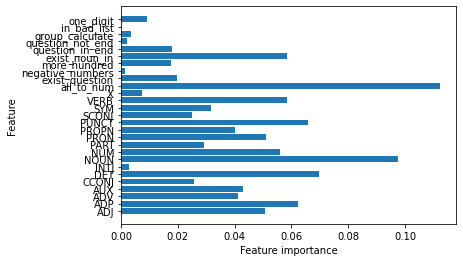

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
data, target, stratify=target, random_state=42)
gbrt = GradientBoostingClassifier(max_features=6, max_depth=15, random_state=0)
gbrt.fit(X_train, y_train)
print("Correctness on the training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Correctness on a test set: {:.3f}".format(gbrt.score(X_test, y_test)))
plot_feature_importances(gbrt)

### Confusion matrix

In [17]:
from sklearn.metrics import confusion_matrix
prediction = gbrt.predict(X_test)
confusion = confusion_matrix(y_test, prediction)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[295 140  15]
 [ 70 613   6]
 [ 56  65  24]]


Confusion matrix
[[0.65555556 0.31111111 0.03333333]
 [0.10159652 0.88969521 0.00870827]
 [0.3862069  0.44827586 0.16551724]]


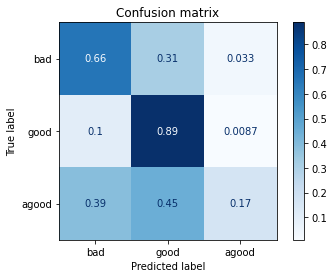

In [18]:
from sklearn.metrics import plot_confusion_matrix
class_names = ('bad', 'good', 'agood')
title = "Confusion matrix"
disp = plot_confusion_matrix(gbrt, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true'
                            )
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)

## Обучение с вариацией по трем параметрам: max_depth, max_features, n_estimators

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
data, target, stratify=target, random_state=42)
max_score = 0
for i in range(5,30):
    for j in range(1,26):
        for k in range(1, 100):
            gbrt = GradientBoostingClassifier(max_depth=i, max_features=j, n_estimators=k, random_state=0)
            gbrt.fit(X_train, y_train)
            if max_score < gbrt.score(X_test, y_test):
                print(f"{i}, {j}, {k}")
                print("Correctness on the training set: {:.3f}".format(gbrt.score(X_train, y_train)))
                print("Correctness on a test set: {:.3f}".format(gbrt.score(X_test, y_test)))
                print()
                max_score = gbrt.score(X_test, y_test)

5, 1, 1
Correctness on the training set: 0.536
Correctness on a test set: 0.537

5, 1, 2
Correctness on the training set: 0.540
Correctness on a test set: 0.538

5, 1, 3
Correctness on the training set: 0.552
Correctness on a test set: 0.557

5, 1, 4
Correctness on the training set: 0.578
Correctness on a test set: 0.581

5, 1, 5
Correctness on the training set: 0.608
Correctness on a test set: 0.606

5, 1, 6
Correctness on the training set: 0.634
Correctness on a test set: 0.629

5, 1, 7
Correctness on the training set: 0.643
Correctness on a test set: 0.641

5, 1, 8
Correctness on the training set: 0.653
Correctness on a test set: 0.650

5, 1, 9
Correctness on the training set: 0.663
Correctness on a test set: 0.655

5, 1, 10
Correctness on the training set: 0.673
Correctness on a test set: 0.660

5, 1, 11
Correctness on the training set: 0.672
Correctness on a test set: 0.668

5, 1, 13
Correctness on the training set: 0.684
Correctness on a test set: 0.673

5, 1, 17
Correctness on t

### max_depth=5, max_features=25, n_estimators=61

Correctness on the training set: 0.809
Correctness on a test set: 0.697


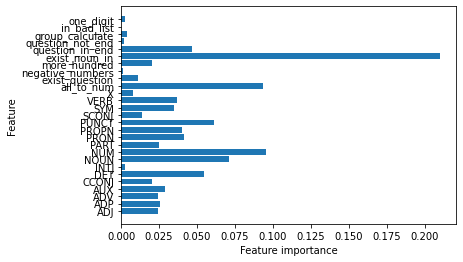

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
data, target, stratify=target, random_state=42)
gbrt = GradientBoostingClassifier(max_depth=5, max_features=25, n_estimators=61, random_state=0)
gbrt.fit(X_train, y_train)
print("Correctness on the training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Correctness on a test set: {:.3f}".format(gbrt.score(X_test, y_test)))
plot_feature_importances(gbrt)

### Confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix
prediction = gbrt.predict(X_test)
confusion = confusion_matrix(y_test, prediction)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[319 127   4]
 [ 91 591   7]
 [ 72  55  18]]


Confusion matrix
[[0.69020501 0.30523918 0.00455581]
 [0.13722628 0.86131387 0.00145985]
 [0.6375     0.3375     0.025     ]]


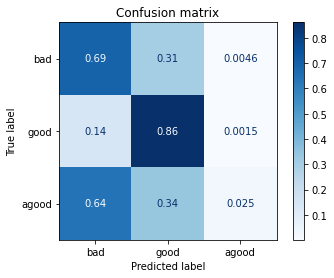

In [14]:
from sklearn.metrics import plot_confusion_matrix
class_names = ('bad', 'good', 'agood')
title = "Confusion matrix"
disp = plot_confusion_matrix(gbrt, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true'
                            )
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)

## Сохранение и загрузка обученных моделей

# Save model

In [18]:
import pickle
# save the model to disk
filename = ROOT_DIR + '/Data/Models/gbrt_validation_model.sav'
pickle.dump(gbrt, open(filename, 'wb'))

После обработки данные сохраняются в директории **Data/Models/gbrt_validation_model.sav** в файл.

# Load model

In [19]:
# load the model from disk
filemane = ROOT_DIR + '/Data/Models/gbrt_validation_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.6970404984423676
